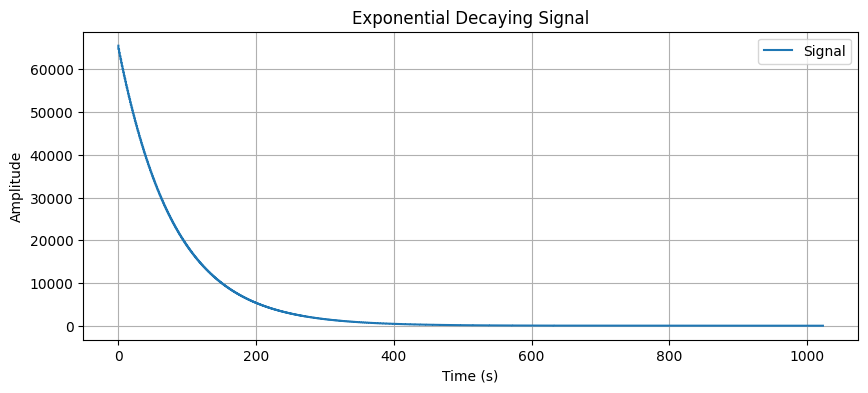

In [4]:
import matplotlib.pyplot as plt
import numpy as np

signal_data = np.genfromtxt('build/data/exp_decay.csv', delimiter=',')

sampling_rate = 800000000
num_samples = len(signal_data)
time_array = np.arange(num_samples)

# Plot the signal
plt.figure(figsize=(10, 4))
plt.step(time_array,signal_data, label='Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Exponential Decaying Signal')
plt.legend()
plt.grid()
plt.show()

In [23]:
NUM_SENSORS = 8 
SIMULATION_TIME = 1
SAMPLE_FREQ = 800e6





array([65535., 64720., 63916., 63122., 62338., 61564., 60799., 60044.,
       59298., 58561.])

In [12]:
np.random.poisson()

0

In [22]:
import numpy as np

# Average rate of decays per second (activity in Bq)
average_rate = 10

# Time interval (in seconds) over which to observe decays
time_interval = 1  # You can adjust this based on your specific time interval

# Generate a random number of pulses based on Poisson distribution
num_pulses = np.random.poisson(average_rate * time_interval)

# Print the number of pulses observed in this time interval
print(f"Number of pulses observed in {time_interval} seconds: {num_pulses}")

Number of pulses observed in 1 seconds: 8


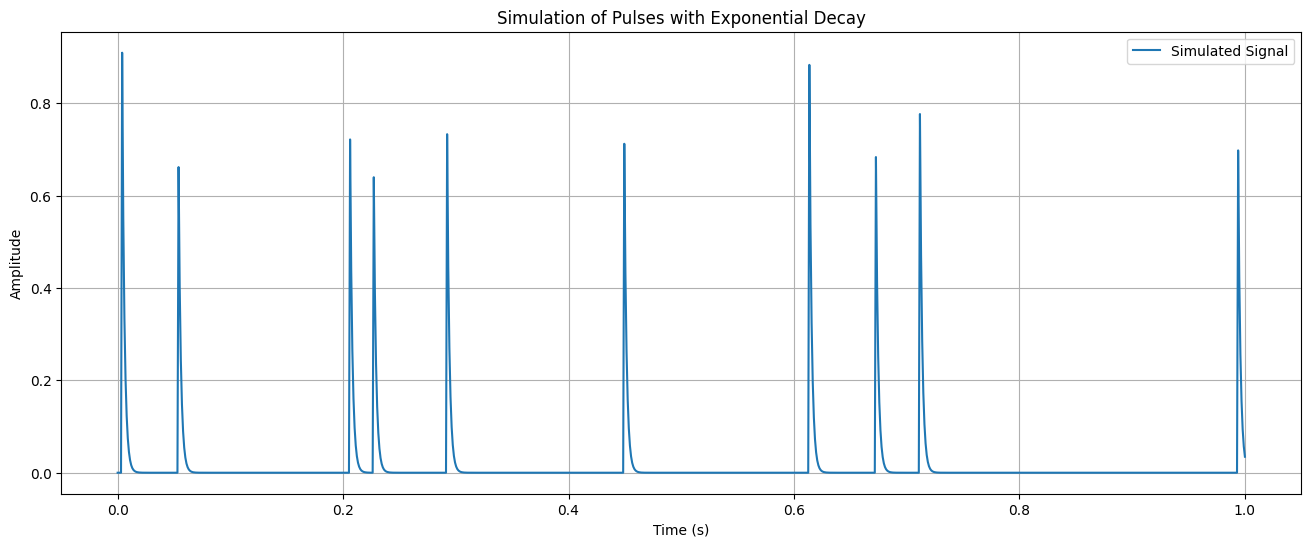

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the simulation
total_time = 1  # Total simulation time in seconds
tau = 2e-3 # Time constant for the exponential decay
activity = 10.0  # Activity in Bq

# Calculate the amplitude for the exponential decay pulse
# so that the integral of the pulse shape over the simulation time matches the activity
amplitude = 1
# Generate the time array for the entire simulation
time_points = np.linspace(0, total_time, 1000)

# Initialize the signal array with zeros
signal = np.zeros_like(time_points)

# Generate trigger times based on a Poisson distribution
num_pulses = np.random.poisson(lam=activity * total_time)
trigger_times = np.sort(np.random.uniform(0, total_time, num_pulses))

# Generate the pulse shapes and add them to the signal array
for trigger_time in trigger_times:
    # Generate the pulse shape for each trigger time
    pulse_shape = amplitude * np.exp(-(time_points - trigger_time) / tau)
    pulse_shape[time_points < trigger_time] = 0  # Set before trigger time to 0
    signal += pulse_shape

# Plot the simulation results
plt.figure(figsize=(16, 6))
plt.plot(time_points, signal, label='Simulated Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Simulation of Pulses with Exponential Decay')
plt.legend()
plt.grid(True)
plt.show()

#


In [66]:
len(time_points)
from math import pi
from numpy import cos, absolute

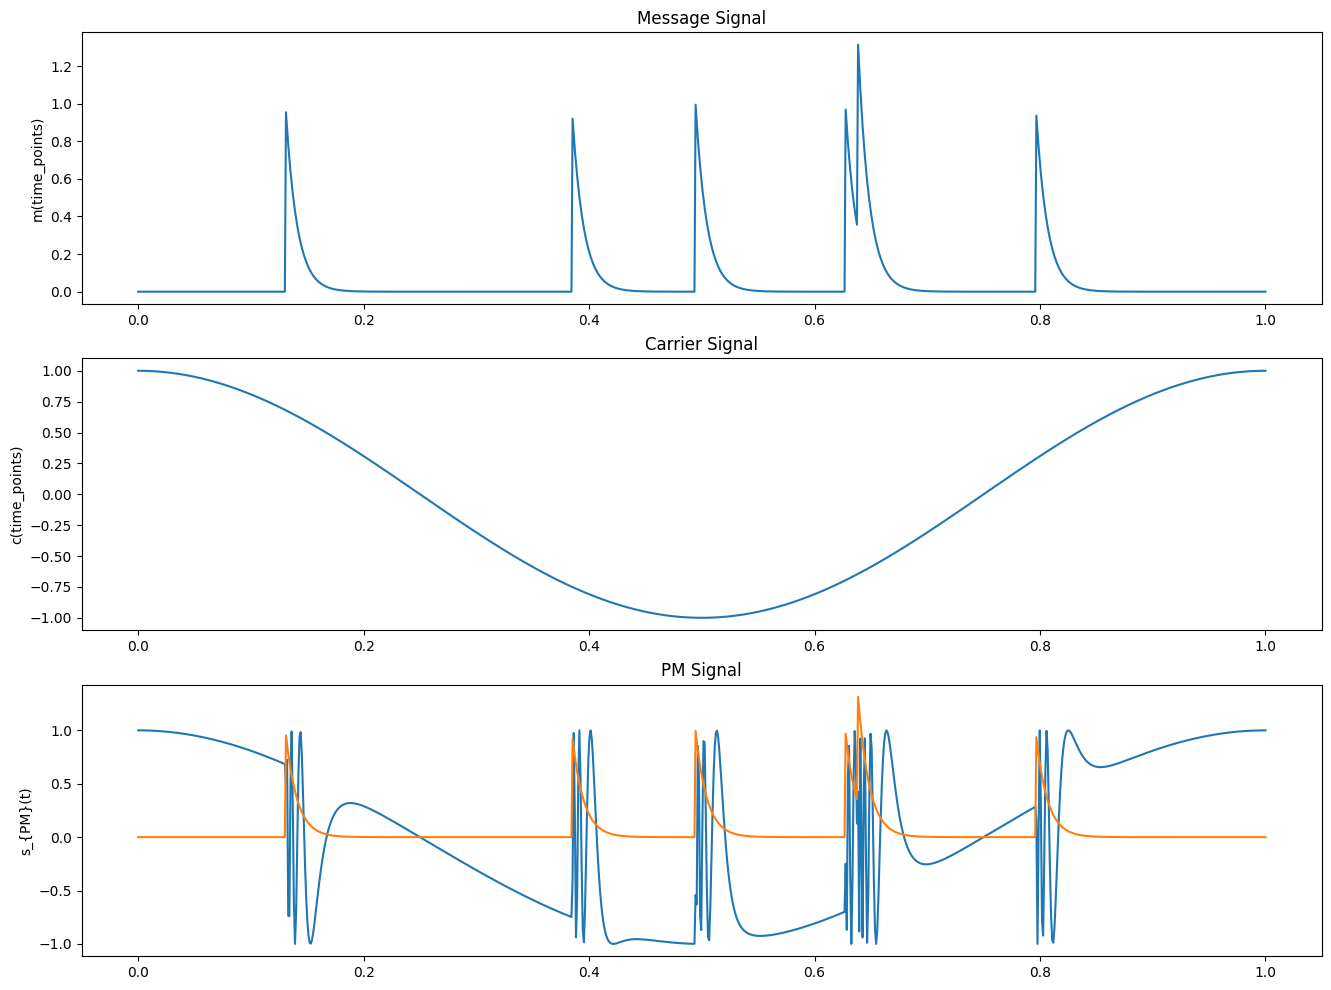

In [74]:
fs = 1/len(time_points) # Sampling Frequency
fc = 1e6 # Carrier Frequency
Ac = 1 # Carrier Amplitude
kp = 20 # Modulation Coefficient
C = Ac*cos(2*pi*fc*time_points) # Carrier Signal
s_PM = [ ]
for (ti, m) in zip(time_points, signal):
    s_PM.append(Ac*cos(2*pi*fc*ti + kp*m))



fig, axs = plt.subplots(3,1, figsize=(16,12))

axs[0].plot(time_points,signal)
axs[0].set(ylabel = 'm(time_points)')
axs[0].set_title('Message Signal')
axs[1].plot(time_points,C)
axs[1].set(ylabel = 'c(time_points)')
axs[1].set_title('Carrier Signal')
axs[2].plot(time_points,s_PM,time_points,signal)
axs[2].set(ylabel ='s_{PM}(t)')
axs[2].set_title('PM Signal')
plt.show()



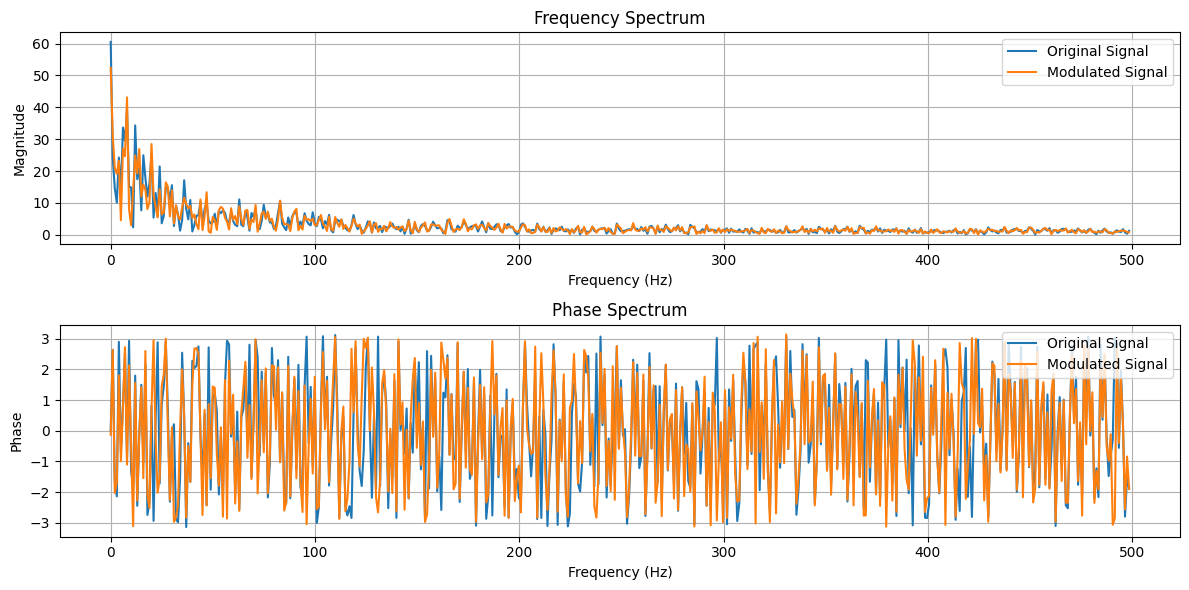

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def plot_frequency_domain(time_points, signal, modulated_signal, sampling_rate=1.0):
    # Calculate the FFT for the signals
    fft_signal = np.fft.fft(signal)
    fft_modulated_signal = np.fft.fft(modulated_signal)

    # Calculate the frequencies corresponding to the FFT result
    n = len(time_points)
    frequencies = np.fft.fftfreq(n, d=time_points[1] - time_points[0])
    positive_frequencies = frequencies[:n//2]  # Only plot positive frequencies

    # Plot the magnitude spectrum
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(positive_frequencies, np.abs(fft_signal[:n//2]), label='Original Signal')
    plt.plot(positive_frequencies, np.abs(fft_modulated_signal[:n//2]), label='Modulated Signal')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('Frequency Spectrum')
    plt.legend()
    plt.grid(True)

    # Plot the phase spectrum
    plt.subplot(2, 1, 2)
    plt.plot(positive_frequencies, np.angle(fft_signal[:n//2]), label='Original Signal')
    plt.plot(positive_frequencies, np.angle(fft_modulated_signal[:n//2]), label='Modulated Signal')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Phase')
    plt.title('Phase Spectrum')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Test the function
plot_frequency_domain(time_points, signal, modulated_signal)